# Mileage Prediction

## Objecitve

To predict the mileage.


## Data Source

From YBI-Foundation Github

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [3]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Describe Data

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## Data Preprocessing

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Data Visualization

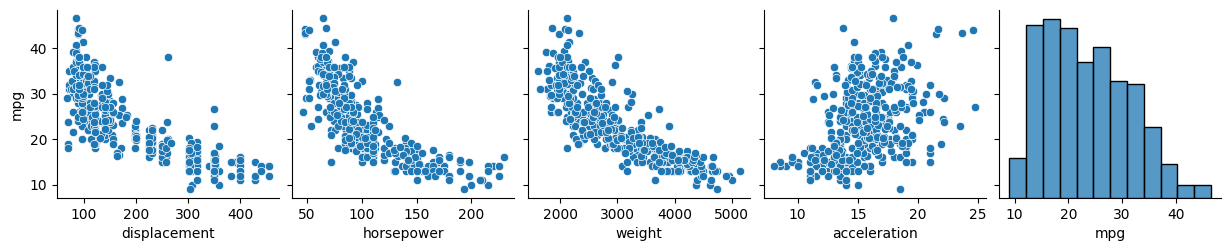

In [16]:
sns.pairplot(df, x_vars = ['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

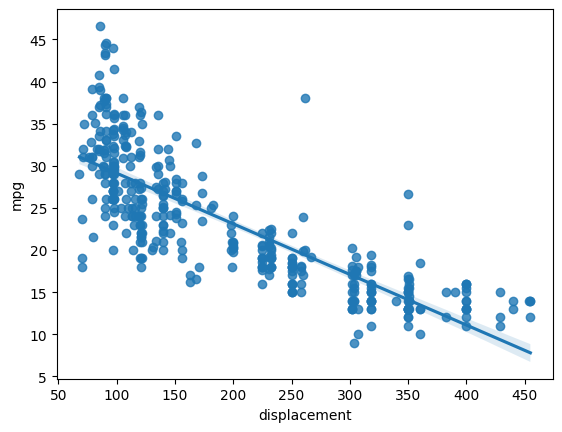

In [18]:
sns.regplot(x='displacement',y='mpg',data=df);

## Define Target Variable (y) and Feature Variables (X)

In [19]:
y = df['mpg']

In [20]:
X = df[['displacement','horsepower','weight','acceleration']]

In [21]:
X.shape

(392, 4)

In [22]:
X.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X = scaler.fit_transform(X)

In [27]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [33]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [34]:
type(X)

numpy.ndarray

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Modeling

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
model.intercept_

23.725139778636965

In [42]:
model.coef_

array([-1.04061664, -2.14102322, -4.02858566, -0.14389381])

## Prediction

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([30.29700847, 24.72839529, 32.77893004, 31.27178433, 26.18332869,
       30.19790285,  9.81526818, 29.58152065, 22.56385356, 33.14051592,
       13.23874517, 24.1391044 , 12.83017376, 30.14280976, 20.38189119,
       27.02039027, 23.57590536, 29.14144886, 27.30788492, 27.65446095,
       24.90558498, 31.16937391, 31.47571282, 18.86721149, 31.78148011,
       28.87714445, 25.22555967, 21.20195807, 32.54635112, 28.1290699 ,
       13.05421087, 22.96640113, 18.90765778, 27.64588509, 12.26835702,
       31.47347388, 12.76589319, 30.02083426, 14.3995173 ,  8.22494206,
       15.94191344, 30.53780211, 31.06244592, 29.44145151, 11.87276816,
        7.01517914, 22.00319607, 30.79931703, 28.60670965, 31.69623013,
       13.98299429, 28.38757853, 28.46369689, 29.32033768, 23.65251357,
       19.54780288, 21.69478155, 23.87779746, 27.91210094, 28.70335923,
        5.28311079, 23.53912511, 24.80800038, 25.40489967, 27.08954575,
       29.33975889, 26.41480722, 31.70667484, 20.92640591,  9.99

## Model Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [51]:
mean_absolute_error(y_test,y_pred)

3.571062458260172

In [53]:
mean_absolute_percentage_error(y_test,y_pred)

0.16585849039360423

In [54]:
r2_score(y_test,y_pred)

0.6464709361746057

## Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [57]:
X_train2 = poly.fit_transform(X_train)

In [58]:
X_test2 = poly.fit_transform(X_test)

In [59]:
model.fit(X_train2,y_train)

LinearRegression()

In [60]:
model.intercept_

21.36346506788059

In [61]:
model.coef_

array([-2.52368317, -6.00923236, -1.20614165, -1.28760869,  1.70981614,
        0.07979862,  0.84172331,  0.84342873, -1.06549005,  0.38737357])

In [62]:
y_pred_poly = model.predict(X_test2)

## Model Evaluation

In [63]:
mean_absolute_error(y_test,y_pred_poly)

3.202958801884848

In [65]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.14172552686749482

In [66]:
r2_score(y_test,y_pred_poly)

0.6726357867835955